In [34]:
import os 
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
path="./Sales_Data"
files=[file for file in os.listdir(path) if not file.startswith('.')] #ignore file
print(files)

['all_data_copy.csv', 'Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


In [36]:
all_month_data=pd.DataFrame()

for file in files:
    current_data=pd.read_csv(path+'/'+file)
    all_month_data=pd.concat([all_month_data, current_data])
all_month_data.to_csv(path+'/'+'all_data_copy.csv',index=False)

In [37]:
all_data=pd.read_csv(path+'/'+'all_data_copy.csv')
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


In [38]:
nan_df=all_data[all_data.isna().any(axis=1)]
print(nan_df.head(),'\n\n' , len(nan_df))

     Order ID Product Quantity Ordered Price Each Order Date Purchase Address
1         NaN     NaN              NaN        NaN        NaN              NaN
356       NaN     NaN              NaN        NaN        NaN              NaN
735       NaN     NaN              NaN        NaN        NaN              NaN
1433      NaN     NaN              NaN        NaN        NaN              NaN
1553      NaN     NaN              NaN        NaN        NaN              NaN 

 5450


In [39]:
all_data=all_data.dropna(how="all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [40]:
all_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,1863050,1863050,1863050,1863050,1863050,1863050
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,3550,219030,1685520,219030,3550,3550


In [41]:
all_data[all_data['Order Date'].str[0:2]=='Or']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
1866814,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1867201,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1868213,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1868282,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [42]:
all_data['Quantity Ordered'][4]

'1'

In [43]:
all_data['Price Each'][4]

'11.99'

In [44]:
all_data[all_data['Quantity Ordered']=='Qua']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [45]:
all_data=all_data[all_data['Quantity Ordered'].str[0:3]!='Qua']

In [46]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype('int64')

In [47]:
all_data['Quantity Ordered'][4]

1

make column correct type

In [48]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])

In [49]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']

0          04
2          04
3          04
4          04
5          04
           ..
1868495    09
1868496    09
1868497    09
1868498    09
1868499    09
Name: Month, Length: 1859500, dtype: object

In [50]:
all_data['Month']=all_data['Month'].astype('int64')
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4


##### we can also find month using datetime

In [51]:
all_data['Month']=pd.to_datetime(all_data['Order Date']).dt.month
all_data['Month'][0] 

4

In [52]:
s='917 1st St, Dallas, TX 75001'

#city
s1=s.split(',')
c=s1[1].strip()
print(c)


#state
s2=s1[2].split()
print(s2[0])

Dallas
TX


In [53]:
def get_city(address):
    return address.split(',')[1].strip()

def get_state(address):
    return address.split(',')[2].split()[0]
all_data['City']=all_data['Purchase Address'].apply(lambda x :f"{get_city(x)} ({get_state(x)}")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA


#### Data Exploration
que1: What was the first mont for sales? how much was earned that month

In [54]:
all_data['Sales']=all_data['Quantity Ordered'].astype('int')*all_data['Price Each'].astype('float')
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA,11.99
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,San Francisco (CA,11.95
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4,Seattle (WA,99.99
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,Atlanta (GA,11.95
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,San Francisco (CA,1700.00
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4,Boston (MA,11.99


In [55]:
all_data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,109030,1.811768e+07,1.822257e+07
2,134490,2.188885e+07,2.202022e+07
3,170050,2.791208e+07,2.807100e+07
4,205580,3.367671e+07,3.390670e+07
5,186670,3.135125e+07,3.152607e+07
6,152530,2.562026e+07,2.577802e+07
7,160720,2.632540e+07,2.647776e+07
8,134480,2.230345e+07,2.244468e+07
9,131090,2.084992e+07,2.097560e+07


range(1, 13)


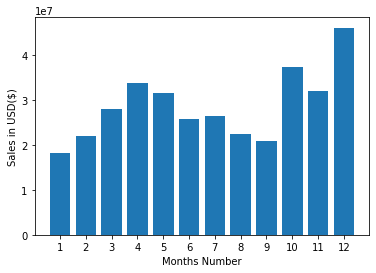

<Figure size 432x288 with 0 Axes>

In [56]:
import matplotlib.pyplot as plt
months=range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Months Number')
plt.show()
plt.savefig('Sales chart.png',dpi=300)


In [57]:
max(all_data.groupby(['Month']).sum()['Sales'])

46134433.4000352

#### Which city sold the most product

In [58]:
all_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA,166020,2.779908e+07,1047940,2.795499e+07
Austin (TX,111530,1.809874e+07,698290,1.819582e+07
Boston (MA,225280,3.637410e+07,1411120,3.661642e+07
Dallas (TX,167300,2.752628e+07,1046200,2.767975e+07
Los Angeles (CA,332890,5.421435e+07,2083250,5.452571e+07
New York City (NY,279320,4.635371e+07,1757410,4.664317e+07
Portland (ME,27500,4.471893e+06,171440,4.497583e+06
Portland (OR,113030,1.860558e+07,706210,1.870732e+07
San Francisco (CA,502390,8.211462e+07,3155200,8.262204e+07


In [59]:
for city, df in all_data.groupby(['City']):
    print(city)

Atlanta (GA
Austin (TX
Boston (MA
Dallas (TX
Los Angeles (CA
New York City (NY
Portland (ME
Portland (OR
San Francisco (CA
Seattle (WA


['Atlanta (GA', 'Austin (TX', 'Boston (MA', 'Dallas (TX', 'Los Angeles (CA', 'New York City (NY', 'Portland (ME', 'Portland (OR', 'San Francisco (CA', 'Seattle (WA']


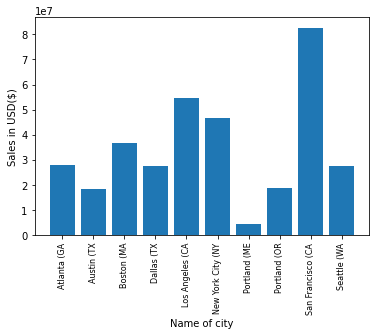

In [60]:
keys=[city for city, df in all_data.groupby(['City'])]
print(keys)
plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD($)')
plt.xlabel('Name of city') 
plt.xticks(keys,rotation='vertical',size=8)
plt.show()

##### What time should we display advertisements to maximize likehood of customer's buying prodect

In [69]:
all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute']=pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count']=1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX,23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA,99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA,600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA,11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA,11.99,9,27,1


In [71]:
all_data.groupby(['Hour']).count()['Count']

Hour
0      39100
1      23500
2      12430
3       8310
4       8540
5      13210
6      24820
7      40110
8      62560
9      87480
10    109440
11    124110
12    125870
13    121290
14    109840
15    101750
16    103840
17    108990
18    122800
19    129050
20    122280
21    109210
22     88220
23     62750
Name: Count, dtype: int64

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


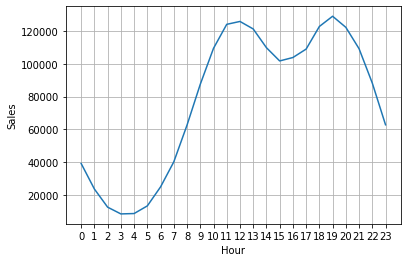

In [74]:
keys=[pair for pair,df in all_data.groupby(['Hour'])]
print(keys)
plt.plot(keys,all_data.groupby(['Hour']).count()['Count'])
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.xticks(keys)
plt.grid()
plt.show()


####  Which product are most often sold together

In [78]:
#https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df=all_data[all_data['Order ID'].duplicated(keep=False)]
#print(df.head())

#Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df2=df[['Order ID','Grouped']].drop_duplicates()
df2.head()

,Order ID,Grouped
0,176558,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
2,176559,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176560,"Google Phone,Wired Headphones,Google Phone,Wir..."
5,176561,"Wired Headphones,Wired Headphones,Wired Headph..."
6,176562,"USB-C Charging Cable,USB-C Charging Cable,USB-..."


In [79]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter
count=Counter()
for row in df2['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
    print(key,value)




('USB-C Charging Cable', 'USB-C Charging Cable') 990435
('Lightning Charging Cable', 'Lightning Charging Cable') 980010
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 933645
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 929465
('Wired Headphones', 'Wired Headphones') 853190
('Apple Airpods Headphones', 'Apple Airpods Headphones') 702105
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 602325
('27in FHD Monitor', '27in FHD Monitor') 338715
('iPhone', 'iPhone') 308090
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 280850


#### What product sold must? Why do you think it sold the must?

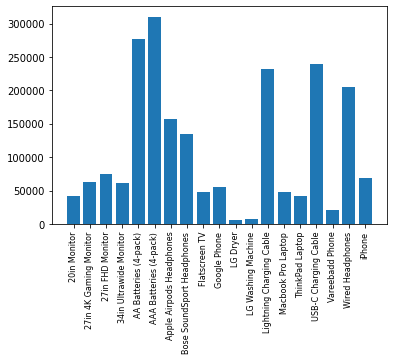

In [81]:
product_group=all_data.groupby('Product')
quantity_ordered=product_group.sum()['Quantity Ordered']
#print(product_group)
#print(quantity_ordered)
keys=[pair for pair,df in product_group]
plt.bar(keys,quantity_ordered)
plt.xticks(keys,rotation='vertical',size=8)
plt.show()

<ipython-input-82-172eeda27244>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical',size=8)
<ipython-input-82-172eeda27244>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


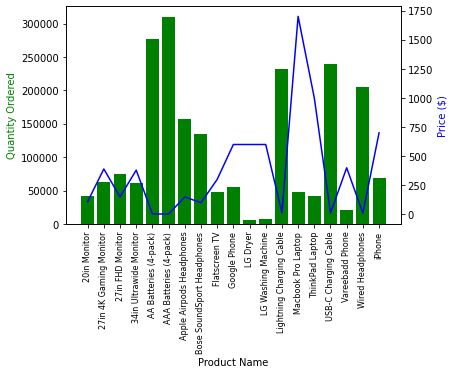

In [82]:
prices=all_data.groupby('Product').mean()['Price Each']
fig, ax1=plt.subplots()

ax2=ax1.twinx()
ax1.bar(keys,quantity_ordered,color='g')
ax2.plot(keys,prices,color='b')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered',color='g')
ax2.set_ylabel('Price ($)',color='b')
ax1.set_xticklabels(keys, rotation='vertical',size=8)
fig.show()